#linear regression


In [3]:
import numpy as np
import matplotlib.pyplot as plt


x_data=[1.0,2.0,3.0]
y_data=[2.0,4.0,6.0]
def forward(x):
    return x*w
def loss(x,y):
    y_pred=forward(x)
    return (y_pred-y)*(y_pred-y)
w_list=[]
mse_list=[]
for w in np.arange(0.0,4.1,0.1):
    print('w=',w)
    l_sum=0
    for x_val,y_val in zip(x_data,y_data):
        y_pred_val=forward(x_val)
        loss_val=loss(x_val,y_val)
        l_sum+=loss_val
        print('\t',x_val,y_val,y_pred_val,loss_val)
    print('MSE=',l_sum/3)
    w_list.append(w)
    mse_list.append(l_sum/3)



w= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
w= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE= 16.846666666666668
w= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE= 15.120000000000003
w= 0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE= 13.486666666666665
w= 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE= 11.946666666666667
w= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 10.5
w= 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE= 9.146666666666663
w= 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4.0 1.4000000000000001 6.75

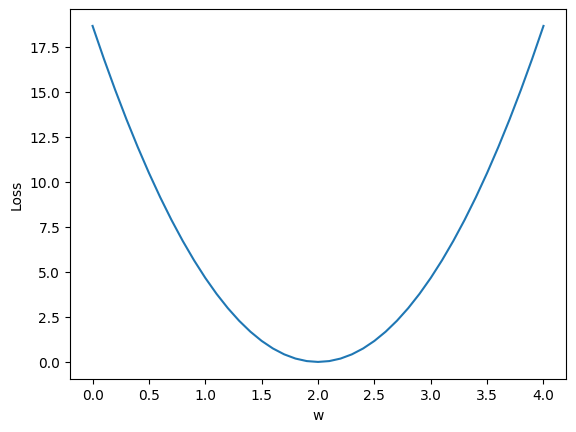

In [8]:

plt.plot(w_list,mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()


#gradient descent

In [9]:

x_data=[1.0,2.0,3.0]
y_data=[2.0,4.0,6.0]

w=1.0
w_list=[]
epoch_list=[]
cost_list=[]

def forward(x):
    return x*w

def cost(xs,ys):
    cost=0
    for x,y in zip(x_data,y_data):
        y_pred=forward(x)
        cost+=(y_pred-y) **2
    return cost/len(xs)

def gradient(xs,ys):
    grad=0
    for x,y in zip(xs,ys):
        grad+=2*x*(x*w-y)
    return grad/len(xs)

print('predict y before training ',4,forward(4))
for epoch in range (100):
    cost_val=cost(x_data,y_data)
    grad_val=gradient(x_data,y_data)
    w-=0.01*grad_val
    w_list.append(w)
    epoch_list.append(epoch)
    cost_list.append(cost_val)
    print('epoch:',epoch,'w=',w,'loss=',cost_val)
print('predict y after training',4,forward(4))




predict y before training  4 4.0
epoch: 0 w= 1.0933333333333333 loss= 4.666666666666667
epoch: 1 w= 1.1779555555555554 loss= 3.8362074074074086
epoch: 2 w= 1.2546797037037036 loss= 3.1535329869958857
epoch: 3 w= 1.3242429313580246 loss= 2.592344272332262
epoch: 4 w= 1.3873135910979424 loss= 2.1310222071581117
epoch: 5 w= 1.4444976559288012 loss= 1.7517949663820642
epoch: 6 w= 1.4963445413754464 loss= 1.440053319920117
epoch: 7 w= 1.5433523841804047 loss= 1.1837878313441108
epoch: 8 w= 1.5859728283235668 loss= 0.9731262101573632
epoch: 9 w= 1.6246153643467005 loss= 0.7999529948031382
epoch: 10 w= 1.659651263674342 loss= 0.6575969151946154
epoch: 11 w= 1.6914171457314033 loss= 0.5405738908195378
epoch: 12 w= 1.7202182121298057 loss= 0.44437576375991855
epoch: 13 w= 1.7463311789976905 loss= 0.365296627844598
epoch: 14 w= 1.7700069356245727 loss= 0.3002900634939416
epoch: 15 w= 1.7914729549662791 loss= 0.2468517784170642
epoch: 16 w= 1.8109354791694263 loss= 0.2029231330489788
epoch: 17 w=

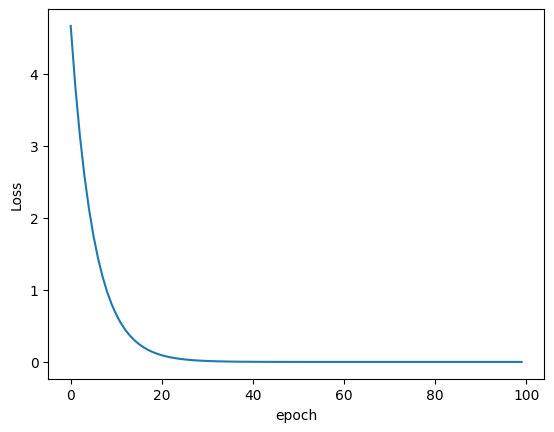

In [10]:


plt.plot(epoch_list,cost_list)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()



#stochastic gradient descent
不能并行处理数据

In [1]:
x_data=[1.0,2.0,3.0,4.0]
y_data=[2.0,4.0,6.0,8.0]

w=1.0
epoch_list=[]
loss_list=[]
w_list=[]
def forward(x):
    return x*w

def loss(x,y):
    y_pred=forward(x)
    return (y_pred-y)**2

def gradient(x,y):
    return 2*x*(x*w-y)

print('pridict before training :',4,forward(4))

for epoch in range(100):
    for x,y in zip(x_data,y_data):
        grad=gradient(x,y)
        w=w-0.01*grad
        print('\tgrad:',x,y,grad)
        l=loss(x,y)
    w_list.append(w)
    epoch_list.append(epoch)
    print('progress:',epoch,'w=',w,'loss=',l)
print('predict after training ',4,forward(4))





pridict before training : 4 4.0
	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.84
	grad: 3.0 6.0 -16.2288
	grad: 4.0 8.0 -23.657984
progress: 0 w= 1.4972678400000001 loss= 4.043833995172248
	grad: 1.0 2.0 -1.0054643199999997
	grad: 2.0 4.0 -3.9414201343999995
	grad: 3.0 6.0 -8.158739678208
	grad: 4.0 8.0 -11.89362939756544
progress: 1 w= 1.7472603753017344 loss= 1.0220370862819224
	grad: 1.0 2.0 -0.5054792493965312
	grad: 2.0 4.0 -1.981478657634403
	grad: 3.0 6.0 -4.101660821303216
	grad: 4.0 8.0 -5.979309997277575
progress: 2 w= 1.8729396625578516 loss= 0.2583092696146019
	grad: 1.0 2.0 -0.2541206748842968
	grad: 2.0 4.0 -0.9961530455464427
	grad: 3.0 6.0 -2.062036804281137
	grad: 4.0 8.0 -3.0059914302409467
progress: 3 w= 1.9361226821073798 loss= 0.06528498785847768
	grad: 1.0 2.0 -0.12775463578524038
	grad: 2.0 4.0 -0.5007981722781416
	grad: 3.0 6.0 -1.036652216615753
	grad: 4.0 8.0 -1.5112085646665179
progress: 4 w= 1.9678868180008364 loss= 0.016500103329782457
	grad: 1.0 2.0 -0.06422636399

ValueError: x and y must have same first dimension, but have shapes (100,) and (41,)

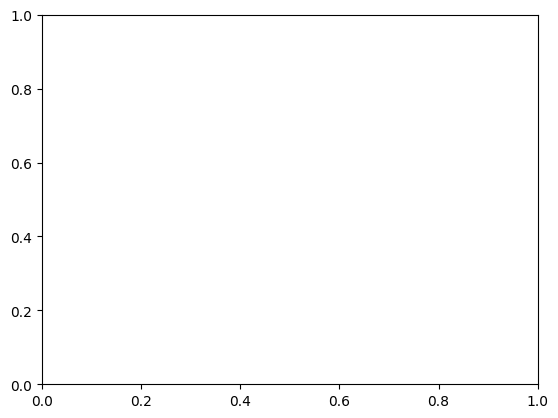

In [4]:
plt.plot(epoch_list,w_list)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()


# back propagation

In [6]:
import torch 

x_data=[1.0,2.0,3.0]
y_data=[2.0,4.0,6.0]

w=torch.Tensor([1.0])
w.requires_grad=True


因为w是tensor，所以w*x后，x自动转换为tensor

In [7]:
def forward(x):
    return w*x

def loss(x,y):
    y_pred=forward(x)
    return (y_pred-y)**2
    

w是一个tensor，其中有data和grad，grad也是一个tensor，取grad的值也需要.data
每次计算后需要清空grad的数据，避免防止影响下次计算

In [8]:
print('predict before training',4,forward(4).item())

for epoch in range(100):
    for x,y in zip(x_data,y_data):
        l=loss(x,y)
        l.backward()
        print('\tgrad:',x,y,w.grad.item())
        w.data=w.data-0.01*w.grad.data
        
        w.grad.data.zero_()
    print('progress',epoch,l.item())
print('pridict after training:',4,forward(4).item())


predict before training 4 4.0
	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.840000152587891
	grad: 3.0 6.0 -16.228801727294922
progress 0 7.315943717956543
	grad: 1.0 2.0 -1.478623867034912
	grad: 2.0 4.0 -5.796205520629883
	grad: 3.0 6.0 -11.998146057128906
progress 1 3.9987640380859375
	grad: 1.0 2.0 -1.0931644439697266
	grad: 2.0 4.0 -4.285204887390137
	grad: 3.0 6.0 -8.870372772216797
progress 2 2.1856532096862793
	grad: 1.0 2.0 -0.8081896305084229
	grad: 2.0 4.0 -3.1681032180786133
	grad: 3.0 6.0 -6.557973861694336
progress 3 1.1946394443511963
	grad: 1.0 2.0 -0.5975041389465332
	grad: 2.0 4.0 -2.3422164916992188
	grad: 3.0 6.0 -4.848389625549316
progress 4 0.6529689431190491
	grad: 1.0 2.0 -0.4417421817779541
	grad: 2.0 4.0 -1.7316293716430664
	grad: 3.0 6.0 -3.58447265625
progress 5 0.35690122842788696
	grad: 1.0 2.0 -0.3265852928161621
	grad: 2.0 4.0 -1.2802143096923828
	grad: 3.0 6.0 -2.650045394897461
progress 6 0.195076122879982
	grad: 1.0 2.0 -0.24144840240478516
	grad: 2.0 4.0 -0.

# pytorch linear regression

optimizer:SGD

In [33]:
import torch

x_data=torch.Tensor([[1.0],[2.0],[3.0]])
y_data=torch.Tensor([[2.0],[4.0],[6.0]])

class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel,self).__init__()
        self.linear=torch.nn.Linear(1,1)

    def forward(self,x):
        y_pred=self.linear(x)
        return y_pred
model =LinearModel()

criterion=torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    y_pred=model (x_data)
    loss=criterion(y_pred,y_data)
    print(epoch,loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('w=',model.linear.weight.item())
print('b=',model.linear.bias.item())

x_test=torch.Tensor([4.0])
y_test=model(x_test)
print('y_pred=',y_test.data)


0 66.97140502929688
1 30.19791030883789
2 13.821871757507324
3 6.526283264160156
4 3.273131847381592
5 1.819633960723877
6 1.1673688888549805
7 0.871863842010498
8 0.7352516651153564
9 0.6694471836090088
10 0.635235607624054
11 0.6151595115661621
12 0.6014454364776611
13 0.5906322598457336
14 0.5811787247657776
15 0.5723958611488342
16 0.5639787912368774
17 0.555787980556488
18 0.5477628707885742
19 0.5398731827735901
20 0.5321068167686462
21 0.5244565606117249
22 0.5169178247451782
23 0.5094882249832153
24 0.5021654367446899
25 0.4949483871459961
26 0.4878348112106323
27 0.48082423210144043
28 0.47391414642333984
29 0.46710267663002014
30 0.4603901505470276
31 0.45377326011657715
32 0.44725191593170166
33 0.4408242702484131
34 0.43448930978775024
35 0.42824482917785645
36 0.4220903217792511
37 0.41602399945259094
38 0.4100452661514282
39 0.404151976108551
40 0.398343950510025
41 0.39261895418167114
42 0.3869762420654297
43 0.38141486048698425
44 0.37593352794647217
45 0.37053063511848

optimizer:Adam

In [4]:
import torch

x_data=torch.Tensor([[1.0],[2.0],[3.0]])
y_data=torch.Tensor([[2.0],[4.0],[6.0]])

class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel,self).__init__()
        self.linear=torch.nn.Linear(1,1)

    def forward(self,x):
        y_pred=self.linear(x)
        return y_pred
model =LinearModel()

criterion=torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(1000):
    y_pred=model (x_data)
    loss=criterion(y_pred,y_data)
    print(epoch,loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('w=',model.linear.weight.item())
print('b=',model.linear.bias.item())

x_test=torch.Tensor([4.0])
y_test=model(x_test)
print('y_pred=',y_test.data.item())


c:\Users\fetishism\.conda\envs\test3_10\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 24.295875549316406
1 23.76837921142578
2 23.246837615966797
3 22.731353759765625
4 22.22201919555664
5 21.718935012817383
6 21.22218132019043
7 20.731849670410156
8 20.248004913330078
9 19.770740509033203
10 19.30010986328125
11 18.836185455322266
12 18.37902069091797
13 17.928678512573242
14 17.48519515991211
15 17.04861831665039
16 16.618986129760742
17 16.19632339477539
18 15.780657768249512
19 15.37200927734375
20 14.970389366149902
21 14.5758056640625
22 14.188264846801758
23 13.807758331298828
24 13.434284210205078
25 13.06782341003418
26 12.708358764648438
27 12.35586929321289
28 12.01032829284668
29 11.671695709228516
30 11.339941024780273
31 11.015024185180664
32 10.69689655303955
33 10.385513305664062
34 10.080818176269531
35 9.782756805419922
36 9.491273880004883
37 9.206303596496582
38 8.927783966064453
39 8.655643463134766
40 8.389814376831055
41 8.130227088928223
42 7.876804828643799
43 7.6294708251953125
44 7.388147354125977
45 7.152754783630371
46 6.923213481903076
47

# logistic regression

In [2]:
import torch.nn.functional as F
import torch
x_data=torch.Tensor([[1.0],[2.0],[3.0]])
y_data=torch.Tensor([[0.0],[0.0],[1.0]])

class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel,self).__init__()
        self.linear=torch.nn.Linear(1,1)
    def forward(self,x):
            y_pred=F.sigmoid(self.linear(x))
            return y_pred
model=LogisticRegressionModel()

criterion=torch.nn.BCELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(10000):
    y_pred=model (x_data)
    loss=criterion(y_pred,y_data)
    print(epoch,loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('w=',model.linear.weight.item())
print('b=',model.linear.bias.item())

x_test=torch.Tensor([4.0])
y_test=model(x_test)
print('y_pred=',y_test.data.item())


c:\Users\fetishism\.conda\envs\test3_10\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
c:\Users\fetishism\.conda\envs\test3_10\lib\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0 2.765807628631592
1 2.743769645690918
2 2.7227954864501953
3 2.702846050262451
4 2.683882713317871
5 2.665865659713745
6 2.648754835128784
7 2.6325106620788574
8 2.617094039916992
9 2.602466106414795
10 2.588587760925293
11 2.5754222869873047
12 2.5629324913024902
13 2.5510830879211426
14 2.5398387908935547
15 2.5291662216186523
16 2.5190329551696777
17 2.5094079971313477
18 2.500260829925537
19 2.491563320159912
20 2.483287811279297
21 2.4754085540771484
22 2.467899799346924
23 2.4607391357421875
24 2.4539031982421875
25 2.447371482849121
26 2.4411239624023438
27 2.435141086578369
28 2.429405927658081
29 2.423901081085205
30 2.418611526489258
31 2.413522481918335
32 2.4086194038391113
33 2.4038901329040527
34 2.399322032928467
35 2.394904613494873
36 2.3906264305114746
37 2.3864781856536865
38 2.382450580596924
39 2.378535032272339
40 2.3747236728668213
41 2.37100887298584
42 2.3673839569091797
43 2.363842487335205
44 2.3603787422180176
45 2.3569869995117188
46 2.3536620140075684
47

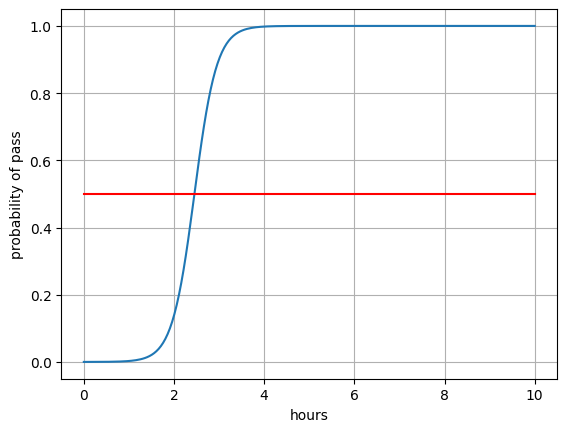

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(0,10,200)
x_t=torch.Tensor(x).view((200,1))
y_t=model(x_t)
y=y_t.data.numpy()
plt.plot(x,y)
plt.plot([0,10],[0.5,0.5],c='r')
plt.xlabel('hours')
plt.ylabel('probability of pass')
plt.grid()
plt.show()

# multiple dimension input

In [46]:
import numpy as np
xy=np.loadtxt(r'C:\Users\fetishism\.conda\envs\test3_10\Lib\site-packages\numpy\lib\diabetes_data.csv.gz',delimiter=' ',dtype=np.float32)
x_data=torch.from_numpy(xy[:,:-1])
y_data=torch.from_numpy(xy[:,[-1]])
y_data=y_data*0.01
for y in y_data:
    if y>1.0:
        print(y)
        y=torch.tensor([1.0])
#上行代码失效
print (x_data,y_data)

tensor([1.2400])
tensor([1.0100])
tensor([1.0400])
tensor([1.1400])
tensor([1.0900])
tensor([1.0300])
tensor([1.0100])
tensor([1.0600])
tensor([1.0900])
tensor([1.0800])
tensor([1.1000])
tensor([1.0100])
tensor([1.1700])
tensor([1.1300])
tensor([1.2400])
tensor([1.0500])
tensor([1.0300])
tensor([1.0900])
tensor([1.2000])
tensor([1.0900])
tensor([1.0500])
tensor([1.0900])
tensor([1.2300])
tensor([1.0100])
tensor([1.0900])
tensor([1.0300])
tensor([1.1200])
tensor([1.0600])
tensor([1.1700])
tensor([1.2200])
tensor([1.1200])
tensor([1.0500])
tensor([1.0200])
tensor([1.1000])
tensor([1.2000])
tensor([1.1700])
tensor([1.0300])
tensor([1.0200])
tensor([1.0800])
tensor([1.0500])
tensor([1.0300])
tensor([1.0300])
tensor([1.0500])
tensor([1.0100])
tensor([1.0100])
tensor([1.0800])
tensor([1.1300])
tensor([1.0500])
tensor([1.0100])
tensor([1.0900])
tensor([1.0800])
tensor([1.0200])
tensor([1.0200])
tensor([1.1100])
tensor([1.1100])
tensor([1.0100])
tensor([1.0800])
tensor([1.0600])
tensor([1.0600

In [45]:
import torch 

class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.linear1=torch.nn.Linear(9,6)
        self.linear2=torch.nn.Linear(6,4)
        self.linear3=torch.nn.Linear(4,1)
        self.sigmoid=torch.nn.Sigmoid()
    
    def forward(self,x):
        x=self.sigmoid(self.linear1(x))
        x=self.sigmoid(self.linear2(x))
        x=self.sigmoid(self.linear3(x))
        return x

model=Model()

criterion=torch.nn.BCELoss(size_average=True)
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

for epoch in range(100):
    
    y_pred=model(x_data)
    loss=criterion(y_pred,y_data)
    print(epoch,loss.item())

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

0 0.530330240726471
1 0.5277458429336548
2 0.5251203179359436
3 0.5224795341491699
4 0.5198614597320557
5 0.5173062682151794
6 0.5148448944091797
7 0.5124849081039429
8 0.5102151036262512
9 0.5080203413963318
10 0.5058897733688354
11 0.503818154335022
12 0.5018043518066406
13 0.49984726309776306
14 0.4979442358016968
15 0.49609050154685974
16 0.4942803680896759
17 0.49250859022140503
18 0.4907706379890442
19 0.48906275629997253
20 0.48738202452659607
21 0.4857262074947357
22 0.48409339785575867
23 0.4824822247028351
24 0.48089149594306946
25 0.47932010889053345
26 0.47776734828948975
27 0.476232647895813
28 0.4747151732444763
29 0.4732145071029663
30 0.4717302918434143
31 0.4702621102333069
32 0.4688096344470978
33 0.46737250685691833
34 0.46595051884651184
35 0.4645433723926544
36 0.46315085887908936
37 0.46177276968955994
38 0.46040886640548706
39 0.4590589106082916
40 0.4577227234840393
41 0.4564000964164734
42 0.45509085059165955
43 0.45379480719566345
44 0.45251166820526123
45 0.4

c:\Users\fetishism\.conda\envs\test3_10\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


# dataset and dataloader

In [90]:
import numpy as np
import torch
from torch.utils.data import Dataset,DataLoader

class DiabetesDataset(Dataset):
    def __init__(self,filepath) :
        xy=np.loadtxt(filepath,delimiter=' ',dtype=np.float32)
        self.len=xy.shape[0]
        self.x_data=torch.from_numpy(xy[:,:-1])
        self.y_data=torch.from_numpy(xy[:,[-1]])
        self.y_data/=100
        self.y_data=torch.clamp(self.y_data,max=1.0)

    def __getitem__(self,index):
        return self.x_data[index],self.y_data[index]

    def __len__(self):
        return self.len

dataset=DiabetesDataset(r'C:\Users\fetishism\.conda\envs\test3_10\Lib\site-packages\numpy\lib\diabetes_data.csv.gz')
train_loader=DataLoader(dataset=dataset,batch_size=32,shuffle=True,num_workers=0)

print (dataset.y_data)


tensor([[0.8700],
        [0.6900],
        [0.8500],
        [0.8900],
        [0.8000],
        [0.6800],
        [0.8200],
        [0.9200],
        [0.9400],
        [0.8800],
        [0.8300],
        [0.7700],
        [0.8100],
        [0.8800],
        [0.7300],
        [0.8100],
        [0.9800],
        [0.9100],
        [0.8700],
        [0.7800],
        [0.9500],
        [0.8700],
        [0.8800],
        [1.0000],
        [0.7800],
        [0.8300],
        [0.9000],
        [1.0000],
        [0.7800],
        [1.0000],
        [0.8900],
        [0.8100],
        [0.9800],
        [0.9200],
        [0.7500],
        [0.9600],
        [0.8500],
        [0.9000],
        [0.9700],
        [0.9200],
        [1.0000],
        [0.8900],
        [0.8300],
        [1.0000],
        [0.8700],
        [0.7900],
        [0.7000],
        [0.7100],
        [0.8600],
        [0.8800],
        [0.9300],
        [0.8600],
        [0.8800],
        [1.0000],
        [0.9300],
        [0

In [91]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.linear1=torch.nn.Linear(9,6)
        self.linear2=torch.nn.Linear(6,3)
        self.linear3=torch.nn.Linear(3,1)
        self.sigmoid=torch.nn.Sigmoid()

    def forward(self,x):
        x=self.sigmoid(self.linear1(x))
        x=self.sigmoid(self.linear2(x))
        x=self.sigmoid(self.linear3(x))
        return x
    
model=Model()

criterion=torch.nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)
for epoch in range(10):
        for i,data in enumerate(train_loader,0):
            inputs,labels=data
            y_pred=model(inputs)
            loss=criterion(y_pred,labels)
            print(epoch,i,loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    




0 0 0.6376581788063049
0 1 0.6347202062606812
0 2 0.6334055662155151
0 3 0.6274242401123047
0 4 0.6285797357559204
0 5 0.6273339986801147
0 6 0.6209364533424377
0 7 0.6248674988746643
0 8 0.6192106604576111
0 9 0.6179333925247192
0 10 0.6145802140235901
0 11 0.6082513332366943
0 12 0.6063079833984375
0 13 0.6083908677101135
1 0 0.6050664186477661
1 1 0.6042381525039673
1 2 0.5977680683135986
1 3 0.6034010648727417
1 4 0.596291184425354
1 5 0.591037392616272
1 6 0.589368999004364
1 7 0.5983121991157532
1 8 0.5902873277664185
1 9 0.5882858633995056
1 10 0.5807426571846008
1 11 0.5834893584251404
1 12 0.5849512219429016
1 13 0.5911563634872437
2 0 0.573794960975647
2 1 0.5737029314041138
2 2 0.578535795211792
2 3 0.5780983567237854
2 4 0.5798036456108093
2 5 0.5696594715118408
2 6 0.5631688833236694
2 7 0.5742090344429016
2 8 0.5559831261634827
2 9 0.5654750466346741
2 10 0.5633218288421631
2 11 0.5493906140327454
2 12 0.5661612153053284
2 13 0.5518258810043335
3 0 0.5607668161392212
3 1 

# Multi-classification problem


In [67]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim

batch_size=64
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307),(0.3081))])
train_dataset=datasets.MNIST(root='..//dataset//mnist/',train=True,download=True,transform=transform)
train_loader=DataLoader(train_dataset,shuffle=True,batch_size=batch_size)

test_dataset=datasets.MNIST(root='..//dataset//mnist',train=False,download=True,transform=transform)
test_loader=DataLoader(test_dataset,shuffle=False,batch_size=batch_size)



In [68]:
class Net(torch.nn.Module):
    def __init__(self) :
        super(Net,self).__init__()
        self.l1=torch.nn.Linear(784,512)
        self.l2=torch.nn.Linear(512,256)
        self.l3=torch.nn.Linear(256,128)
        self.l4=torch.nn.Linear(128,64)
        self.l5=torch.nn.Linear(64,10)
    
    def forward(self,x):
        x=x.view(-1,784)
        x=F.relu(self.l1(x))
        x=F.relu(self.l2(x))
        x=F.relu(self.l3(x))
        x=F.relu(self.l4(x))
        return self.l5(x)
    
model =Net()

In [69]:
criterion=torch.nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01,momentum=0.5)


In [70]:
def train(epoch):
    running_loss=0.0
    for batch_idx,data in enumerate(train_loader,0):
        inputs,target=data
        optimizer.zero_grad()

        outputs=model(inputs)
        loss=criterion(outputs,target)
        loss.backward()
        optimizer.step()

        running_loss+=loss.item()
        if batch_idx%300==299:
            print('[%d,%5d]  loss:%.3f'%(epoch+1,batch_idx+1,running_loss/300))
            running_lossing=0.0
            

In [71]:
def test():
    correct=0
    total=0
    with torch.no_grad():
        for data in test_loader:
            images,labels=data
            outputs=model(images)
            predicted=torch.max(outputs.data,dim=1)
            total+=labels.size(0)
            correct+=(predicted[1]==labels).sum().item()
            #print(predicted[1])
            #print(labels)
    print('accuracy on test set:%f%%'%(100*correct/total))
    

In [72]:
for epoch in range(10):
    train(epoch)
    test()

[1,  300]  loss:2.225
[1,  600]  loss:3.083
[1,  900]  loss:3.484
accuracy on test set:90.600000%
[2,  300]  loss:0.310
[2,  600]  loss:0.566
[2,  900]  loss:0.788
accuracy on test set:94.340000%
[3,  300]  loss:0.182
[3,  600]  loss:0.346
[3,  900]  loss:0.494
accuracy on test set:95.760000%
[4,  300]  loss:0.126
[4,  600]  loss:0.242
[4,  900]  loss:0.356
accuracy on test set:96.680000%
[5,  300]  loss:0.095
[5,  600]  loss:0.187
[5,  900]  loss:0.276
accuracy on test set:96.820000%
[6,  300]  loss:0.070
[6,  600]  loss:0.143
[6,  900]  loss:0.218
accuracy on test set:97.350000%
[7,  300]  loss:0.057
[7,  600]  loss:0.115
[7,  900]  loss:0.174
accuracy on test set:97.470000%
[8,  300]  loss:0.042
[8,  600]  loss:0.095
[8,  900]  loss:0.144
accuracy on test set:97.290000%
[9,  300]  loss:0.036
[9,  600]  loss:0.075
[9,  900]  loss:0.115
accuracy on test set:97.640000%
[10,  300]  loss:0.030
[10,  600]  loss:0.061
[10,  900]  loss:0.094
accuracy on test set:97.670000%


# CNN

In [130]:
import torch 
in_channels,out_channels=5,10
width,height=100,100
batch_size=1

input =torch.randn(batch_size,in_channels,width,height)
conv_layer=torch.nn.Conv2d(in_channels,out_channels,kernel_size=3)

output=conv_layer(input)

print(input.shape)
print(output.shape)
print(conv_layer.weight.shape)

torch.Size([1, 5, 100, 100])
torch.Size([1, 10, 98, 98])
torch.Size([10, 5, 3, 3])


In [131]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim

batch_size=64
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307),(0.3081))])
train_dataset=datasets.MNIST(root='..//dataset//mnist/',train=True,download=True,transform=transform)
train_loader=DataLoader(train_dataset,shuffle=True,batch_size=batch_size)

test_dataset=datasets.MNIST(root='..//dataset//mnist',train=False,download=True,transform=transform)
test_loader=DataLoader(test_dataset,shuffle=False,batch_size=batch_size)


In [132]:
class Net(torch.nn.Module):
    def __init__(self) :
        super(Net,self).__init__()
        self.conv1=torch.nn.Conv2d(1,10,kernel_size=5)
        self.conv2=torch.nn.Conv2d(10,20,kernel_size=5)
        self.pooling=torch.nn.MaxPool2d(2)
        self.fc=torch.nn.Linear(320,10)

    def forward(self,x):
        batch_size=x.size(0)
        x=F.relu(self.pooling(self.conv1(x)))
        x=F.relu(self.pooling(self.conv2(x)))
        x=x.view(batch_size,-1)
        x=self.fc(x)
        return x

model=Net()
device=torch.device('cuda:0')
model.to(device)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=320, out_features=10, bias=True)
)

In [133]:
criterion=torch.nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01,momentum=0.5)


In [134]:
def train(epoch):
    running_loss=0.0
    for batch_idx,data in enumerate(train_loader,0):
        inputs,target=data
        #inputs,target=inputs.to(device),target.to(device)

        
        inputs=inputs.cuda()
        target=target.cuda()
        optimizer.zero_grad()

        
        outputs=model(inputs)
        loss=criterion(outputs,target)

        loss.backward()
        optimizer.step()

        running_loss+=loss.item()
        if batch_idx%300==299:
            print('[%d,%5d]  loss:%.3f'%(epoch+1,batch_idx+1,running_loss/300))
            running_loss=0.0
            

In [135]:
def test():
    correct=0
    total=0
    with torch.no_grad():
        for data in test_loader:
            images,labels=data
            images=images.to(device)
            labels=labels.to(device)

            #images=images.cuda()
            #labels=labels.cuda()
            
            outputs=model(images)
            predicted=torch.max(outputs.data,dim=1)
            total+=labels.size(0)
            correct+=(predicted[1]==labels).sum().item()
            #print(predicted[1])
            #print(labels)
    print('accuracy on test set:%f%%'%(100*correct/total))
    

In [136]:
for epoch in range(10):
    train(epoch)
    test()

[1,  300]  loss:0.611
[1,  600]  loss:0.202
[1,  900]  loss:0.144
accuracy on test set:96.450000%
[2,  300]  loss:0.119
[2,  600]  loss:0.104
[2,  900]  loss:0.096
accuracy on test set:97.820000%
[3,  300]  loss:0.080
[3,  600]  loss:0.077
[3,  900]  loss:0.077
accuracy on test set:98.000000%
[4,  300]  loss:0.066
[4,  600]  loss:0.067
[4,  900]  loss:0.060
accuracy on test set:98.470000%
[5,  300]  loss:0.059
[5,  600]  loss:0.057
[5,  900]  loss:0.054
accuracy on test set:98.520000%
[6,  300]  loss:0.048
[6,  600]  loss:0.051
[6,  900]  loss:0.049
accuracy on test set:98.590000%
[7,  300]  loss:0.043
[7,  600]  loss:0.047
[7,  900]  loss:0.043
accuracy on test set:98.710000%
[8,  300]  loss:0.041
[8,  600]  loss:0.039
[8,  900]  loss:0.043
accuracy on test set:98.610000%
[9,  300]  loss:0.039
[9,  600]  loss:0.033
[9,  900]  loss:0.043
accuracy on test set:98.810000%
[10,  300]  loss:0.038
[10,  600]  loss:0.031
[10,  900]  loss:0.035
accuracy on test set:98.620000%


a more complex edtion

In [1]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim

batch_size=64
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307),(0.3081))])
train_dataset=datasets.MNIST(root='..//dataset//mnist/',train=True,download=True,transform=transform)
train_loader=DataLoader(train_dataset,shuffle=True,batch_size=batch_size)

test_dataset=datasets.MNIST(root='..//dataset//mnist',train=False,download=True,transform=transform)
test_loader=DataLoader(test_dataset,shuffle=False,batch_size=batch_size)


In [6]:
class InceptionA(torch.nn.Module):
    def __init__(self,in_channels):
        super(InceptionA,self).__init__()
        self.branch1x1=torch.nn.Conv2d(in_channels,16,kernel_size=1)

        self.branch5x5_1=torch.nn.Conv2d(in_channels,16,kernel_size=1)
        self.branch5x5_2=torch.nn.Conv2d(16,24,kernel_size=5,padding=2)
        
        self.branch3x3_1=torch.nn.Conv2d(in_channels,16,kernel_size=1)
        self.branch3x3_2=torch.nn.Conv2d(16,24,kernel_size=3,padding=1)
        self.branch3x3_3=torch.nn.Conv2d(24,24,kernel_size=3,padding=1)

        self.branch_pool=torch.nn.Conv2d(in_channels,24,kernel_size=1)

    def forward(self,x):
        branch1x1=self.branch1x1(x)

        branch5x5=self.branch5x5_1(x)
        branch5x5=self.branch5x5_2(branch5x5)

        branch3x3=self.branch3x3_1(x)
        branch3x3=self.branch3x3_2(branch3x3)
        branch3x3=self.branch3x3_3(branch3x3)

        branch_pool=F.avg_pool2d(x,kernel_size=3,stride=1,padding=1)
        branch_pool=self.branch_pool(branch_pool)

        outputs=[branch1x1,branch5x5,branch3x3,branch_pool]
        return torch.cat(outputs,dim=1)
    
class Net(torch.nn.Module):
    def __init__(self) :
        super(Net,self).__init__()
        self.conv1=torch.nn.Conv2d(1,10,kernel_size=5)
        self.conv2=torch.nn.Conv2d(88,20,kernel_size=5)
        self.incept1=InceptionA(in_channels=10)
        self.incept2=InceptionA(in_channels=20)
        self.mp=torch.nn.MaxPool2d(2)
        self.fc=torch.nn.Linear(1408,10)

    def forward(self,x):
        in_size=x.size(0)
        x=F.relu(self.mp(self.conv1(x)))
        x=self.incept1(x)
        x=F.relu(self.mp(self.conv2(x)))
        x=self.incept2(x)
        x=x.view(in_size,-1)
        x=self.fc(x)
        return x

model=Net()
device=torch.device('cuda:0')
model.to(device)

criterion=torch.nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01,momentum=0.5)


def train(epoch):
    running_loss=0.0
    for batch_idx,data in enumerate(train_loader,0):
        inputs,target=data
        #inputs,target=inputs.to(device),target.to(device)

        
        inputs=inputs.cuda()
        target=target.cuda()
        optimizer.zero_grad()

        
        outputs=model(inputs)
        loss=criterion(outputs,target)

        loss.backward()
        optimizer.step()

        running_loss+=loss.item()
        if batch_idx%300==299:
            print('[%d,%5d]  loss:%.3f'%(epoch+1,batch_idx+1,running_loss/300))
            running_loss=0.0

def test():
    correct=0
    total=0
    with torch.no_grad():
        for data in test_loader:
            images,labels=data
            images=images.to(device)
            labels=labels.to(device)

            #images=images.cuda()
            #labels=labels.cuda()
            
            outputs=model(images)
            predicted=torch.max(outputs.data,dim=1)
            total+=labels.size(0)
            correct+=(predicted[1]==labels).sum().item()
            #print(predicted[1])
            #print(labels)
    print('accuracy on test set:%f%%'%(100*correct/total))

for epoch in range(10):
    train(epoch)
    test()

[1,  300]  loss:0.875
[1,  600]  loss:0.201
[1,  900]  loss:0.148
accuracy on test set:96.810000%
[2,  300]  loss:0.113
[2,  600]  loss:0.099
[2,  900]  loss:0.091
accuracy on test set:97.930000%
[3,  300]  loss:0.080
[3,  600]  loss:0.076
[3,  900]  loss:0.071
accuracy on test set:98.150000%
[4,  300]  loss:0.064
[4,  600]  loss:0.065
[4,  900]  loss:0.063
accuracy on test set:98.360000%
[5,  300]  loss:0.058
[5,  600]  loss:0.057
[5,  900]  loss:0.052
accuracy on test set:98.560000%
[6,  300]  loss:0.051
[6,  600]  loss:0.049
[6,  900]  loss:0.047
accuracy on test set:98.580000%
[7,  300]  loss:0.043
[7,  600]  loss:0.046
[7,  900]  loss:0.046
accuracy on test set:98.620000%
[8,  300]  loss:0.040
[8,  600]  loss:0.040
[8,  900]  loss:0.041
accuracy on test set:98.610000%
[9,  300]  loss:0.037
[9,  600]  loss:0.037
[9,  900]  loss:0.040
accuracy on test set:98.410000%
[10,  300]  loss:0.036
[10,  600]  loss:0.036
[10,  900]  loss:0.035
accuracy on test set:98.750000%


residual edition

In [1]:
import torch 
import torch.nn as nn
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim

batch_size=64
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307),(0.3081))])
train_dataset=datasets.MNIST(root='..//dataset//mnist/',train=True,download=True,transform=transform)
train_loader=DataLoader(train_dataset,shuffle=True,batch_size=batch_size)

test_dataset=datasets.MNIST(root='..//dataset//mnist',train=False,download=True,transform=transform)
test_loader=DataLoader(test_dataset,shuffle=False,batch_size=batch_size)



In [3]:
class ResidualBlock(nn.Module):
    def __init__(self,channels) :
        super(ResidualBlock,self).__init__()
        self.channels=channels
        self.conv1=nn.Conv2d(channels,channels,kernel_size=3,padding=1)
        self.conv2=nn.Conv2d(channels,channels,kernel_size=3,padding=1)
    
    def forward(self,x):
        y=F.relu(self.conv1(x))
        y=self.conv2(y)
        return F.relu(x+y)
    
class ResNet(nn.Module):
    def __init__(self) -> None:
        super(ResNet,self).__init__()
        self.conv1=nn.Conv2d(1,16,kernel_size=5)
        self.mp1=nn.MaxPool2d(2)
        self.rblock1=ResidualBlock(16)
        self.conv2=nn.Conv2d(16,32,kernel_size=5)
        self.mp2=nn.MaxPool2d(2)
        self.rblock2=ResidualBlock(32)
        self.fc=nn.Linear(512,10)
    
    def forward(self,x):
        in_size=x.size(0)
        x=self.mp1(F.relu(self.conv1(x)))
        x=self.rblock1(x)
        x=self.mp2(F.relu(self.conv2(x)))
        x=self.rblock2(x)
        x=x.view(in_size,-1)
        x=self.fc(x)
        return x
    
model=ResNet()
device=torch.device('cuda:0')
model.to(device)

criterion=torch.nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01,momentum=0.5)

def train(epoch):
    running_loss=0.0
    for batch_idx,data in enumerate(train_loader,0):
        inputs,target=data
        inputs,target=inputs.to(device),target.to(device)
        optimizer.zero_grad()
        
        outputs=model(inputs)
        loss=criterion(outputs,target)

        loss.backward()
        optimizer.step()

        running_loss+=loss.item()
        if batch_idx%300==299:
            print('[%d,%5d]  loss:%.3f'%(epoch+1,batch_idx+1,running_loss/300))
            running_loss=0.0


def test():
    correct=0
    total=0
    with torch.no_grad():
        for data in test_loader:
            images,labels=data
            images=images.to(device)
            labels=labels.to(device)
            outputs=model(images)
            predicted=torch.max(outputs.data,dim=1)
            total+=labels.size(0)
            correct+=(predicted[1]==labels).sum().item()
            
    print('accuracy on test set:%f%%'%(100*correct/total))

for epoch in range(10):
    train(epoch)
    test()

[1,  300]  loss:0.535
[1,  600]  loss:0.154
[1,  900]  loss:0.107
accuracy on test set:97.390000%
[2,  300]  loss:0.085
[2,  600]  loss:0.083
[2,  900]  loss:0.071
accuracy on test set:97.940000%
[3,  300]  loss:0.059
[3,  600]  loss:0.063
[3,  900]  loss:0.052
accuracy on test set:98.570000%
[4,  300]  loss:0.049
[4,  600]  loss:0.047
[4,  900]  loss:0.049
accuracy on test set:98.460000%
[5,  300]  loss:0.043
[5,  600]  loss:0.036
[5,  900]  loss:0.045
accuracy on test set:98.660000%
[6,  300]  loss:0.036
[6,  600]  loss:0.035
[6,  900]  loss:0.037
accuracy on test set:98.910000%
[7,  300]  loss:0.031
[7,  600]  loss:0.033
[7,  900]  loss:0.030
accuracy on test set:98.820000%
[8,  300]  loss:0.027
[8,  600]  loss:0.029
[8,  900]  loss:0.029
accuracy on test set:98.870000%
[9,  300]  loss:0.024
[9,  600]  loss:0.027
[9,  900]  loss:0.025
accuracy on test set:99.020000%
[10,  300]  loss:0.021
[10,  600]  loss:0.025
[10,  900]  loss:0.022
accuracy on test set:98.880000%


# RNN

## based on cell

In [12]:
import torch 

batch_size=1
seq_len=3
input_size=4
hidden_size=2

cell=torch.nn.RNNCell(input_size=input_size,hidden_size=hidden_size)

dataset=torch.randn(seq_len,batch_size,input_size)
hidden=torch.zeros(batch_size,hidden_size)

for idx,input in enumerate(dataset):
    print('='*20,idx,'='*20)
    print('input size:',input.shape)
    hidden=cell(input,hidden)
    print('output size:',hidden.shape)
    print(hidden)

==================== 0 ====================
input size: torch.Size([1, 4])
output size: torch.Size([1, 2])
tensor([[ 0.0863, -0.7370]], grad_fn=<TanhBackward0>)
==================== 1 ====================
input size: torch.Size([1, 4])
output size: torch.Size([1, 2])
tensor([[0.5242, 0.4441]], grad_fn=<TanhBackward0>)
==================== 2 ====================
input size: torch.Size([1, 4])
output size: torch.Size([1, 2])
tensor([[ 0.2926, -0.5344]], grad_fn=<TanhBackward0>)


## based on RNN

In [14]:
import torch 

batch_size=1
seq_len=3
input_size=4
hidden_size=2
num_layers=1

cell=torch.nn.RNN(input_size=input_size,hidden_size=hidden_size,num_layers=num_layers)

inputs=torch.randn(seq_len,batch_size,input_size)
hidden=torch.zeros(num_layers,batch_size,hidden_size)

out,hidden=cell(inputs,hidden)

print('output size:',out.shape)
print('output:',out)
print('hidden size:',hidden.shape)
print('hidden:',hidden)


output size: torch.Size([3, 1, 2])
output: tensor([[[-0.9139,  0.1724]],

        [[-0.9593, -0.2949]],

        [[-0.9151,  0.7851]]], grad_fn=<StackBackward0>)
hidden size: torch.Size([1, 1, 2])
hidden: tensor([[[-0.9151,  0.7851]]], grad_fn=<StackBackward0>)


## a complete version based on RNNCell

In [25]:
import torch
input_size=4
hidden_size=4
batch_size=1

idx2char=['e','h','l','o']
x_data=[1,0,2,2,3]
y_data=[3,1,2,3,2]

one_hot_lookup=[[1,0,0,0],
                [0,1,0,0],
                [0,0,1,0],
                [0,0,0,1]]

x_one_hot=[one_hot_lookup[x] for x in x_data]

inputs=torch.Tensor(x_one_hot).view(-1,batch_size,input_size)
labels=torch.LongTensor(y_data).view(-1,1)

class Model(torch.nn.Module):
    def __init__(self,input_size,hidden_size,batch_size,num_layers=1):
        super(Model,self).__init__()
        self.batch_size=batch_size
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.rnncell=torch.nn.RNNCell(input_size=self.input_size,hidden_size=self.hidden_size)
    
    def forward(self,input,hidden):
        hidden=self.rnncell(input,hidden)
        return hidden
    
    def init_hidden(self):
        return torch.zeros(self.batch_size,self.hidden_size)

net=Model(input_size,hidden_size,batch_size)

criterion=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(net.parameters(),lr=0.1)

for epoch in range(15):
    loss=0
    optimizer.zero_grad()
    hidden=net.init_hidden()
    print('predict string',end=' ')
    for input,label in zip(inputs,labels):
        hidden=net(input,hidden)
        loss+=criterion(hidden,label)
        _,idx=hidden.max(dim=1)
        print(idx2char[idx.item()],end='')
    loss.backward()
    optimizer.step()
    print(',epoch [%d/15] loss=%.4f'%(epoch+1,loss.item()))

predict string hohoh,epoch [1/15] loss=6.6370
predict string oolol,epoch [2/15] loss=5.4369
predict string oolll,epoch [3/15] loss=5.0528
predict string ollll,epoch [4/15] loss=4.7584
predict string ohlll,epoch [5/15] loss=4.3899
predict string ohlol,epoch [6/15] loss=4.0885
predict string ohlol,epoch [7/15] loss=3.8609
predict string ohlol,epoch [8/15] loss=3.6385
predict string ohlol,epoch [9/15] loss=3.5195
predict string ohlol,epoch [10/15] loss=3.4348
predict string ohlol,epoch [11/15] loss=3.2564
predict string ohlol,epoch [12/15] loss=3.0686
predict string ohlol,epoch [13/15] loss=2.9574
predict string ohlol,epoch [14/15] loss=2.8714
predict string ohlol,epoch [15/15] loss=2.7535
